# MINI PROSJEKT- VILDE SITT FORSØK

This small project aims to compare the real-life behavior of sorting algorithms with theoretical expectations. This requires measurements: real-life, physical experiments on computer code and data of repeated tests run on sorted data. In your paper, you shall implement and benchmark the following sorting algorithms, using the algorithms presented in pseudocode in the course:

* Insertion sort
* Merge sort
* Quicksort

In your benchmarks, you shall use test data suitable to test the the behavior of the algorithms under the worst-case, best case and average-case scenarios. In order to study the scaling behavior of algorithms with problem size, one usually increases problem size 𝑛 by a factor, e.g., 2, 10 or 16 instead of increasing the problem size linearly.
You can limit your largest problem size so that the full set of all benchmarks do not execute long on your computer. Drop test cases that take a too long time (e.g., large sizes for quadratic algorithms)

In [19]:
# Imports for the code
import random
import time
from prettytable import PrettyTable
import matplotlib.pyplot as plt

## Insertion sort experiment

In [20]:
def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]
        i = j - 1
        while i >= 0 and A[i] > key:
            A[i + 1] = A[i]  
            i = i - 1
        A[i + 1] = key  

# For å teste koden med et eksempel
arr = [12, 11, 13, 5, 6]
insertion_sort(arr)
print("Sortert array er:", arr)


Sortert array er: [5, 6, 11, 12, 13]


### Cases:

For insertion sort the best case would be to have all the best case occurs if the array is already sorted. The worst case would be if the array is in reverse, that is in decreasing order. The average case would be something in between this, which is a randomized array.

In [21]:
def best_case(n):
    return list(range(n))

def worst_case_for_insertion_sort(n):
    return list(range(n, 0, -1))

def average_case(n):
    lst = list(range(n))
    random.shuffle(lst)
    return lst

# Funksjon for å måle kjøretid av Insertion Sort
def measure_sort_time(func, data):
    start_time = time.time()
    func(data)
    return time.time() - start_time

# Teste størrelser
sizes = [10, 100, 1000, 10000]  # Insertion Sort kan være svært langsom for store størrelser

# Tomme lister
best_times = []
worst_times = []
average_times = []

# Kjøre tester
table = PrettyTable()
table.field_names = ["Størrelse", "Beste tilfelle tid (sek)", "Verste tilfelle tid (sek)", "Gjennomsnittlig tilfelle tid (sek)"]

for size in sizes:
    data_best = best_case(size)
    time_best = measure_sort_time(insertion_sort, data_best[:])
    best_times.append(time_best)
    
    data_worst = worst_case_for_insertion_sort(size)
    time_worst = measure_sort_time(insertion_sort, data_worst[:])
    worst_times.append(time_worst)
    
    data_average = average_case(size)
    time_average = measure_sort_time(insertion_sort, data_average[:])
    average_times.append(time_average)
    
    # Legger til en ny rad i tabellen for hver størrelse
    table.add_row([size, f"{time_best:.8f}", f"{time_worst:.8f}", f"{time_average:.8f}"])

print(table)


+-----------+--------------------------+---------------------------+------------------------------------+
| Størrelse | Beste tilfelle tid (sek) | Verste tilfelle tid (sek) | Gjennomsnittlig tilfelle tid (sek) |
+-----------+--------------------------+---------------------------+------------------------------------+
|     10    |        0.00000000        |         0.00000000        |             0.00000000             |
|    100    |        0.00000000        |         0.00099874        |             0.00099921             |
|    1000   |        0.00099993        |         0.24369335        |             0.04307556             |
|   10000   |        0.00000000        |         9.77723670        |             5.08478737             |
+-----------+--------------------------+---------------------------+------------------------------------+


## Vizualisation:

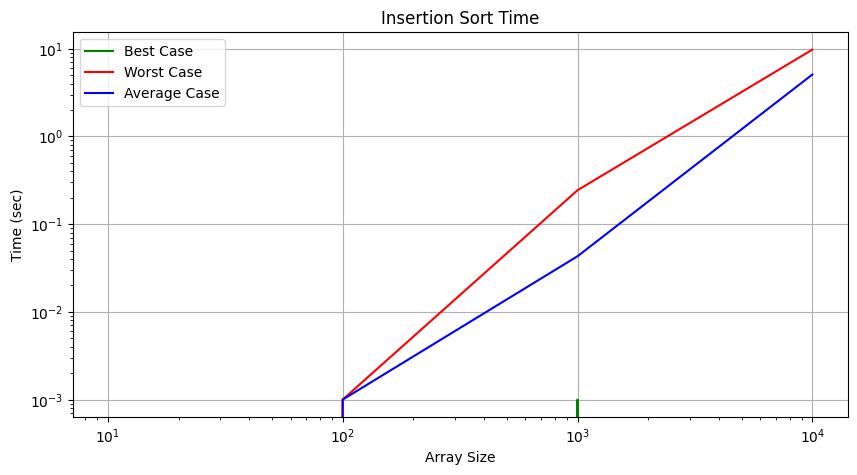

In [25]:
plt.figure(figsize=[10,5])
plt.plot(sizes, best_times, 'g-', label='Best Case')
plt.plot(sizes, worst_times, 'r-', label='Worst Case')
plt.plot(sizes, average_times, 'b-', label='Average Case')
plt.xlabel('Array Size')
plt.ylabel('Time (sec)')
plt.title('Insertion Sort Time')
plt.legend()
plt.grid(True)
plt.xscale('log') 
plt.yscale('log')
plt.show()